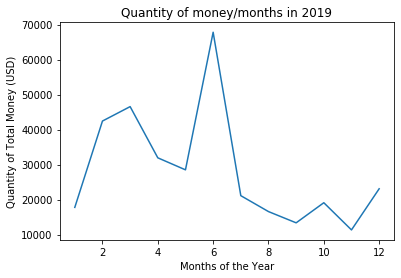

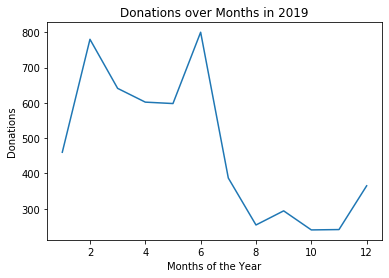

JACK TOPIOL
9180
3417
6114
{'YI XING', 'HANS CAMPANO', 'HAROLD FELDMAN', 'SONIA ROSEN', 'LES AND MARY SHAW', 'JOHN DETRE', 'DOMINIC SISTI', 'DONGWAN KIM', 'JOHN SCOTT BURKHARDT', 'R. POLK WAGNER', 'MARY MULLINS', 'EVE TROUTT POWELL', 'KIM KOVACH TROUT', 'JONATHAN SUPOVITZ', 'ALLAN PACK', 'BRENDAN OLEARY', 'MARY SUSAN LINDEE', 'ROB RIGGLEMAN', 'TOM DOLGENOS', 'ANDREW VAUGHAN', 'THOMAS WADDEN', 'JUDITH RODIN', 'LINDA LEIBOWITZ', 'MICHAEL NUSBAUM', 'JUDITH GRINSPAN', 'LAURA PERNA', 'DANIEL A COHEN', 'KRISTEN LYNCH', 'JOHN L. BASSANI', 'TERESA GILLEN', 'TOM WADDEN', 'GEORGE GERTON', 'DR CS RUSSO', 'SOL ENGLANDER', 'SARAH KAVANAGH', 'R. SCOTT HANSON', 'SUSAN BRAKE', 'GUSTAVO AGUIRRE', 'CYNTHIA HSU', 'ROBERT ST.+GEORGE', 'LAURENCE EISENLOHR', 'ME FISHER', 'SAM APPLE', 'KATHY HALL', 'HENRY KRANZLER', 'PREDRAG BAKIC', 'AARON WUNSCH', 'YOICHIRO MORI', 'JAN VAN DER SPIEGEL', 'MAGGIE MCKINLEY', 'JASON MOORE', 'DONITA BRADY', 'DAVID CARLSON', 'MINGHONG MA', 'EDWARD BRODKIN', 'PAM GROSSMAN', 'BETH 

In [1]:
import pandas
import datetime
import re
import matplotlib.pyplot as plt

import json
from pandas import Series, DataFrame

dft = pandas.read_csv('donations.csv')

# print(dft['contribution_receipt_date'])

counter = 0
dateMap = {}
quantMap = {}

monthlist = []
datelist = []

quantlist = []

casset = set()
casset.add("AAMW")
casset.add("AFAM")
casset.add("AFRC")
casset.add("AFST")
casset.add("ALAN")
casset.add("AMCS")
casset.add("AMES")
casset.add("ANCH")
casset.add("ANCS")
casset.add("ANEL")
casset.add("ANTH")
casset.add("APOP")
casset.add("ARAB")
casset.add("ARCH")
casset.add("ARTH")
casset.add("BCHE")
casset.add("BDS")
casset.add("BENG")
casset.add("BIBB")
casset.add("BIOE")
casset.add("BIOH")
casset.add("BIOL")
casset.add("BIOT")
casset.add("BMB")
casset.add("CHEM")
casset.add("CHIN")
casset.add("CIMS")
casset.add("CINE")
casset.add("CLST")
casset.add("COGS")
casset.add("COLL")
casset.add("COML")
casset.add("CRIM")
casset.add("DEMG")
casset.add("DTCH")
casset.add("DTCH")

seaset = set()
seaset.add("BE")
seaset.add("CBE")
seaset.add("CHE")
seaset.add("CIS")
seaset.add("CIT")
seaset.add("CSE")
seaset.add("DATA")

wharset = set()
wharset.add("ACCT")
wharset.add("BEPP")
wharset.add("BPUB")

nurset = set()

oset = set()
oset.add("BENF")
oset.add("BFLW")
oset.add("BFMD")
oset.add("BRYN")
oset.add("BSTA")
oset.add("CAMB")
oset.add("COMM")
oset.add("CPLN")
oset.add("DSGN")
oset.add("DYNM")



for i in range(0, len(dft['contribution_receipt_date'])):
    if (dft['contributor_employer'][i] == "UNIVERSITY OF PENNSYLVANIA" or dft['contributor_employer'][i] == "THE UNIVERSITY OF PENNSYLVANIA"):    
        str = dft["contribution_receipt_date"][i]
        arr = re.split('/ | ', str)
        date = arr[0].split("/")
        month = int(date[0])
        if (month in dateMap):
            dateMap[month] = dateMap[month] + 1
        else:
            dateMap[month] = 1
        
        quantity = int(dft['contribution_receipt_amount'][i])
        
        if (month in quantMap):
            quantMap[month] = quantMap[month] + quantity
        else:
            quantMap[month] = quantity
        counter+=1
#         print(date)

for i in range(1, 13):
    monthlist.append(i)
    datelist.append(dateMap[i])
    quantlist.append(quantMap[i])
    
plt.plot(monthlist, quantlist)
plt.ylabel('Quantity of Total Money (USD)')
plt.xlabel('Months of the Year')
plt.title('Quantity of money/months in 2019')
plt.show()

plt.plot(monthlist, datelist)
plt.ylabel('Donations')
plt.xlabel('Months of the Year')
plt.title('Donations over Months in 2019')
plt.show()

data = None
instructors = set()
no_data_instructors = set()

with open('instructors.json') as f:
    data = json.load(f)

print(data["result"]["values"][0]["name"])
print(len(data["result"]["values"]))
length = len(data["result"]["values"])

for i in range(0, length):
    name = data["result"]["values"][i]["name"]
    name_arr = name.split(" ")
    chars = len(name_arr)
#     print(name_arr[0] + " " + name_arr[chars - 1])
    instructors.add(name_arr[0] + " " + name_arr[chars - 1])

def normalizeName(name):
    name_string = dft['contributor_name'][i]
    name_string = name_string.replace(',', ' ')
    name_arr = name_string.split(' ')
#     print(name_arr)
    if (len(name_arr) == 3):
        return name_arr[2] + " " + name_arr[0]
    else:
        return name_arr[1] + " " + name_arr[0]
    
positiveMatch = 0
for i in range(0, len(dft['contribution_receipt_date'])):
    if (dft['contributor_employer'][i] == "UNIVERSITY OF PENNSYLVANIA" or dft['contributor_employer'][i] == "THE UNIVERSITY OF PENNSYLVANIA"):  
        cont_name = dft['contributor_name'][i]
        normalized_name = dft['contributor_first_name'][i] + " " + dft['contributor_last_name'][i]
#         print(normalized_name)
        if (normalized_name in instructors):
            positiveMatch += 1
        else:
            no_data_instructors.add(normalized_name)



print(positiveMatch)
# print(counter)
print(len(dft['contribution_receipt_date']))
# print(dateMap)
print(no_data_instructors)

